In [236]:
import pandas as pd

In [2]:
import numpy as np


In [237]:
import matplotlib.pyplot as plt
import seaborn as sns


In [238]:
%matplotlib inline

### Check out the Data

In [239]:
ADPrice = pd.read_csv('tvmarketing_data.csv')

In [241]:
ADPrice.head()

,TV_Price,Sales_Total
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [242]:
ADPrice.tail()

,TV_Price,Sales_Total
200,116.0,11.0
201,76.4,11.8
202,170.2,11.7
203,276.7,11.8
204,165.6,12.6


In [243]:
ADPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TV_Price     205 non-null    float64
 1   Sales_Total  205 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [244]:
ADPrice.describe()

,TV_Price,Sales_Total
count,205.000000,205.000000
mean,147.382439,13.967805
std,85.475632,5.165386
min,0.700000,1.600000
25%,75.100000,10.400000
50%,149.800000,12.800000
75%,218.500000,17.300000
max,296.400000,27.000000


In [245]:
ADPrice.columns

Index(['TV_Price', 'Sales_Total'], dtype='object')

# EDA

Let's create some simple plots to check out the data!

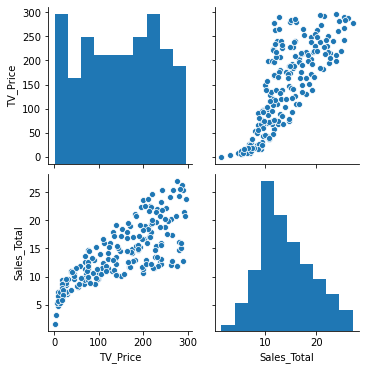

In [246]:
sns.pairplot(ADPrice)

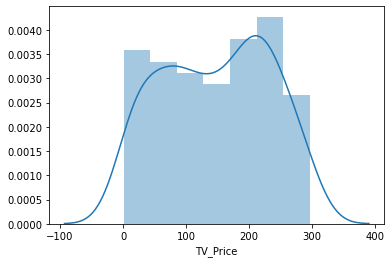

In [247]:
sns.distplot(ADPrice['TV_Price'])

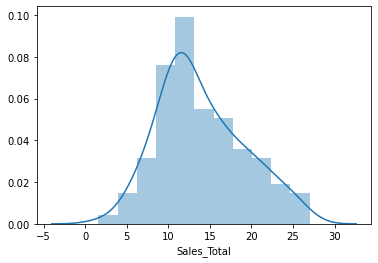

In [248]:
sns.distplot(ADPrice['Sales_Total'])

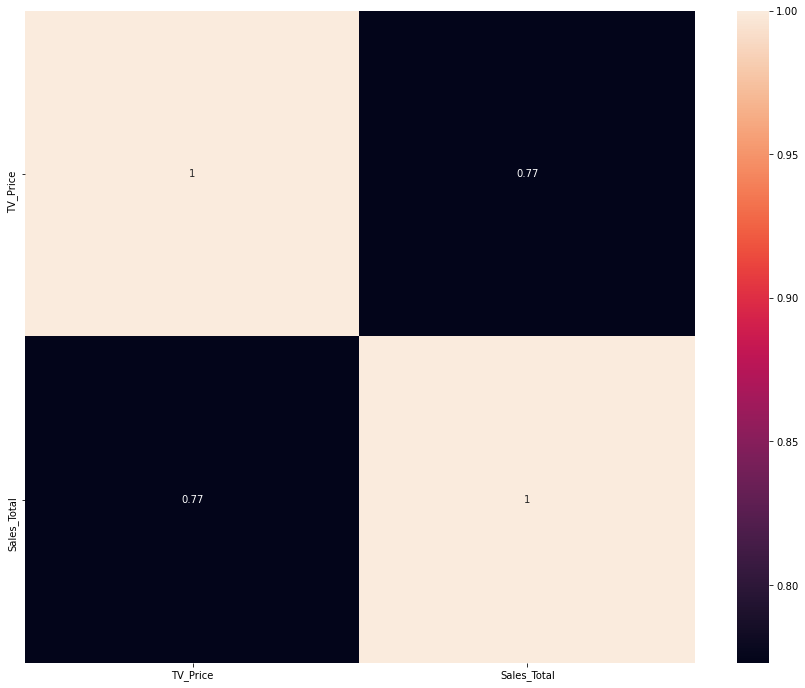

In [249]:
plt.figure(figsize = (15,12))     # 
sns.heatmap(ADPrice.corr(),annot = True)

In [196]:
ADPrice.columns

Index(['TV_Price', 'Sales_Total'], dtype='object')

In [250]:
X = ADPrice[['TV_Price']]
y = ADPrice['Sales_Total']

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [198]:
from sklearn.model_selection import train_test_split

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)


## Creating and Training the Model

In [253]:
from sklearn.linear_model import LinearRegression

In [257]:
lm = LinearRegression()

In [260]:
lm.fit(X_train,y_train)

LinearRegression()

In [259]:
y_pred = lm.predict(X_test)

In [261]:
# print the intercept
print(lm.intercept_)
print(lm.coef_)

6.8467549837529305
[0.04723532]


In [263]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV_Price,0.047235


In [264]:
predictions = lm.predict(X_test)

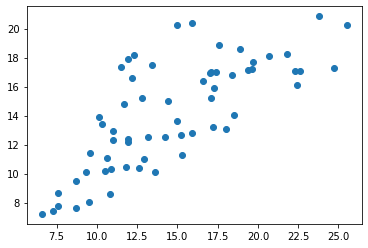

In [265]:
plt.scatter(y_test,predictions)

In [266]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)


In [267]:
r_squared = r2_score(y_test, y_pred)

In [268]:
from sklearn import metrics

In [269]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r_square_value :',r_squared)

MAE: 2.469622432921207
MSE: 9.751030293924511
RMSE: 3.1226639739050555
r_square_value : 0.5464824195375888


In [229]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [271]:
(m, b) = np.polyfit(y_test,y_pred, 1)

0.5950161443580766 5.405989086089336


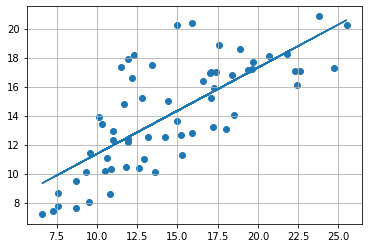

In [275]:
print(m, b)

yp = np.polyval([m, b], y_test)
plt.plot(y_test, yp)
plt.grid(True)
plt.scatter(y_test,y_pred)

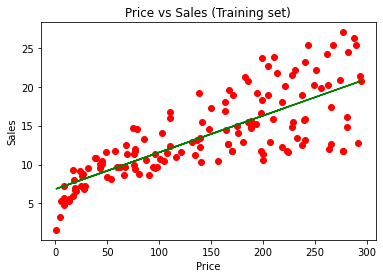

In [291]:
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, lm.predict(X_train), color = "green")
plt.title("Price vs Sales (Training set)")
plt.xlabel("Price")
plt.ylabel("Sales")
plt.show()

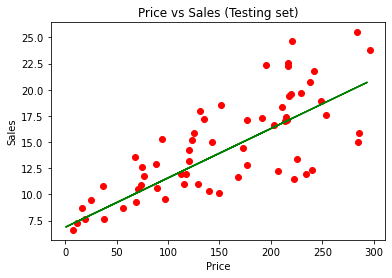

In [284]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_train, lm.predict(X_train), color = "green")
plt.title("Price vs Sales (Testing set)")
plt.xlabel("Price")
plt.ylabel("Sales")
plt.show()

Text(0, 0.5, 'Housing Price')

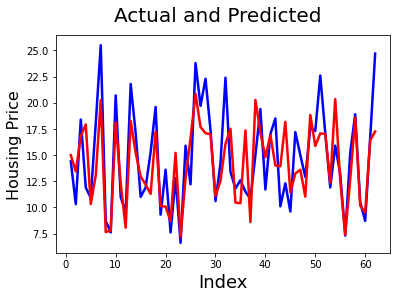

In [294]:
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")     
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")  #
fig.suptitle('Actual and Predicted', fontsize=20)               
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Housing Price', fontsize=16) 

Text(0, 0.5, 'ytest-ypred')

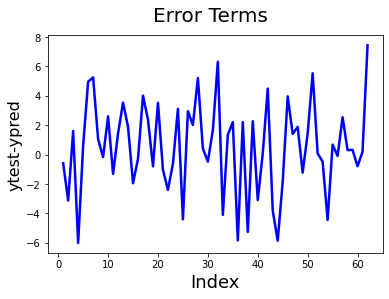

In [290]:
# Error terms
c = [i for i in range(1,63,)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                       
plt.ylabel('ytest-ypred', fontsize=16)                 